In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
%matplotlib inline




In [163]:
#read file and convert it to a dataframe(df)

file = "data/SeoulBikeData.csv"
data = pd.read_csv(file)
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [165]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [166]:
data.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

<AxesSubplot:>

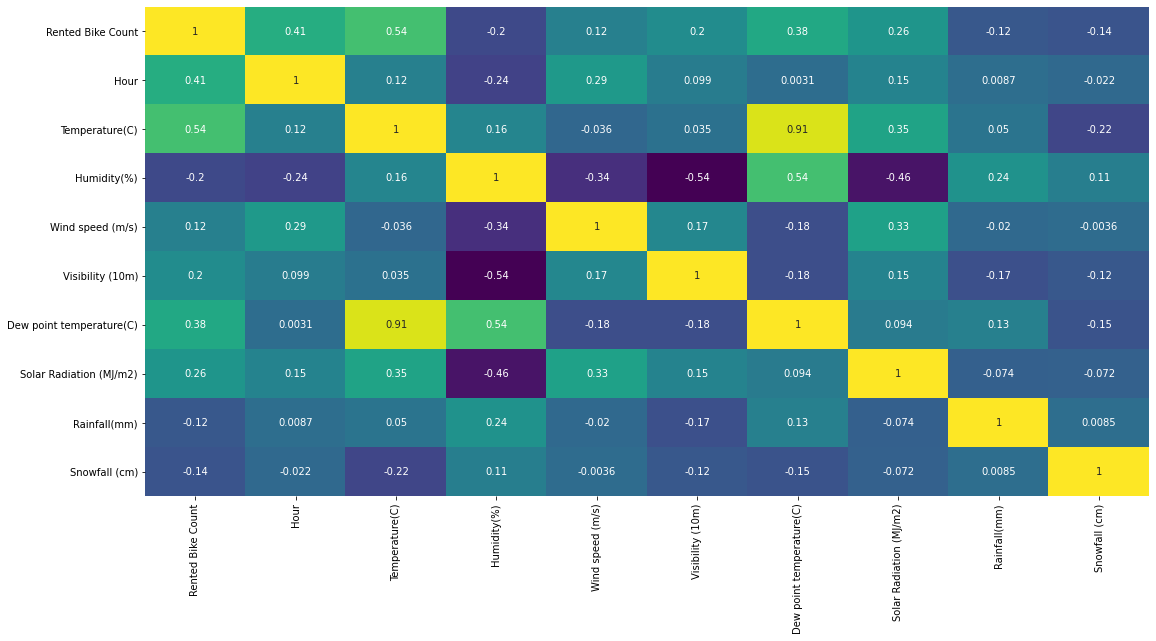

In [167]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(), annot=True, cmap='viridis',cbar=False)

### dew point temp and temp is highly corr imma keep temp n drop dew point

In [168]:
data.drop('Dew point temperature(C)',1,inplace=True)

<AxesSubplot:>

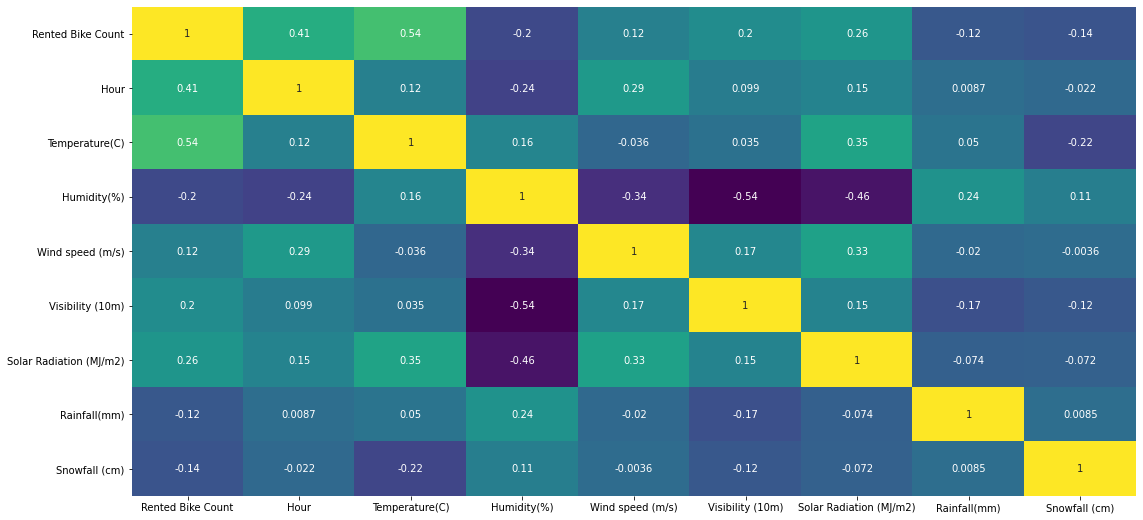

In [169]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(), annot=True, cmap='viridis',cbar=False)

In [170]:
data.head(2)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes


In [171]:
data.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000


In [172]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [173]:
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month



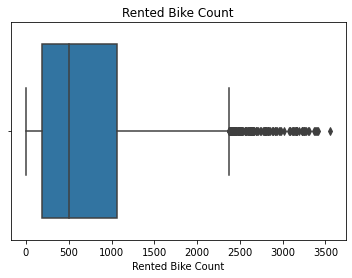

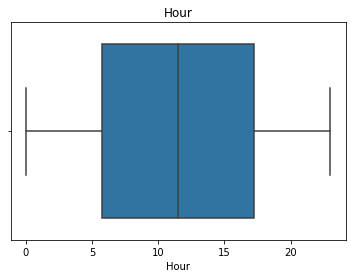

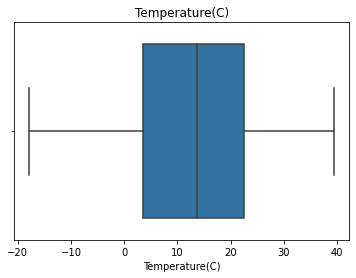

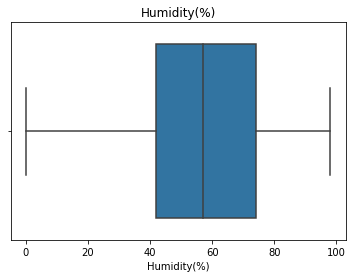

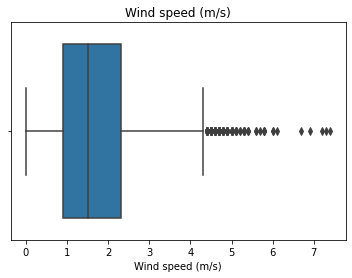

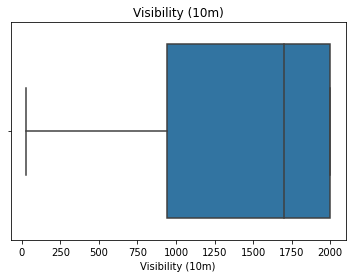

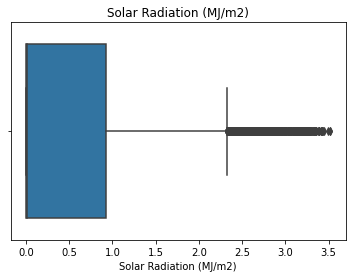

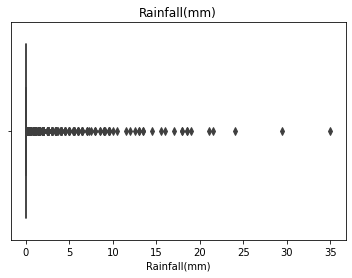

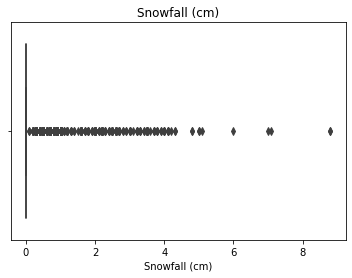

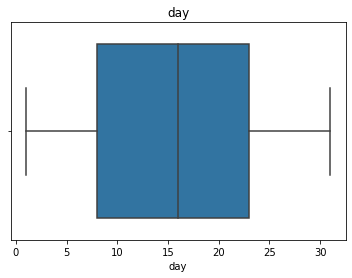

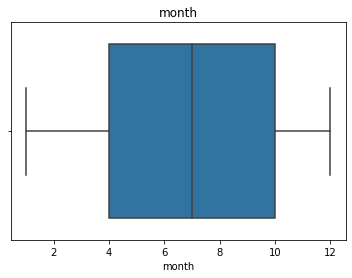

In [174]:
for x in data.columns:
    if x not in ['Date','Seasons','Holiday','Functioning Day']:
        sns.boxplot(x=data[x])
        plt.title(x)
        plt.xlabel(x)
        plt.show()

In [175]:
max_thres_bike = data['Rented Bike Count'].quantile(.9)

In [176]:
df = data[data['Rented Bike Count'] < max_thres_bike]

In [177]:
max_wind = df['Wind speed (m/s)'].quantile(0.9) 

In [178]:
df2 = df[df['Wind speed (m/s)'] < max_wind]

In [179]:
max_solar = df2['Solar Radiation (MJ/m2)'].quantile(0.9)

In [180]:
df3 = df2[df2['Solar Radiation (MJ/m2)'] < max_solar]

In [206]:
#max_rain = df3['Rainfall(mm)'].quantile(0.9)
#max_rain

In [207]:
#df4 = df3[df3['Rainfall(mm)'] < max_rain]

In [208]:
#max_snow = df3['Snowfall (cm)'].quantile(0.9)

In [209]:
#df5 = df4[df4['Snowfall (cm)'] < max_snow]

In [230]:
df4 = df3.drop(['Snowfall (cm)','Rainfall(mm)'],1)

In [232]:
df4

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,Winter,No Holiday,Yes,12,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,Winter,No Holiday,Yes,12,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,Winter,No Holiday,Yes,12,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,Winter,No Holiday,Yes,12,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,Winter,No Holiday,Yes,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,0.0,Autumn,No Holiday,Yes,30,11
8756,2018-11-30,764,20,3.4,37,2.3,2000,0.0,Autumn,No Holiday,Yes,30,11
8757,2018-11-30,694,21,2.6,39,0.3,1968,0.0,Autumn,No Holiday,Yes,30,11
8758,2018-11-30,712,22,2.1,41,1.0,1859,0.0,Autumn,No Holiday,Yes,30,11


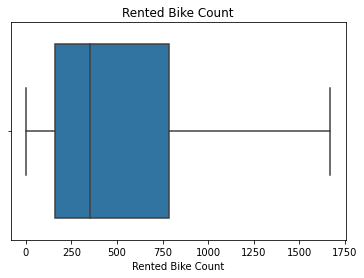

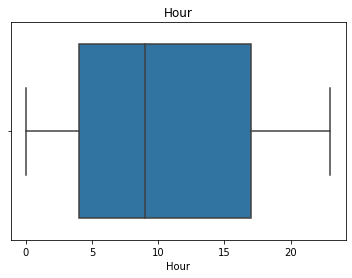

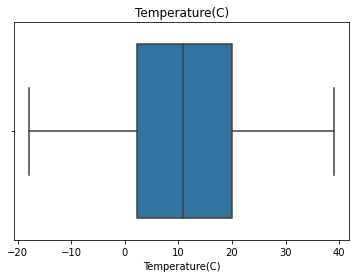

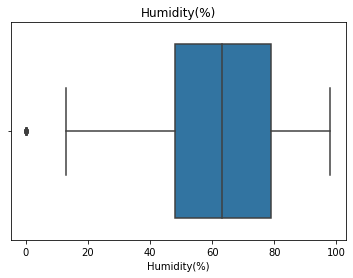

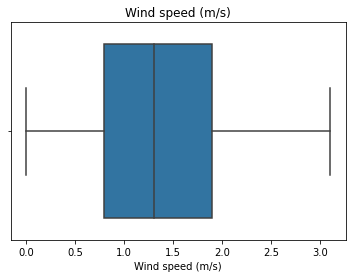

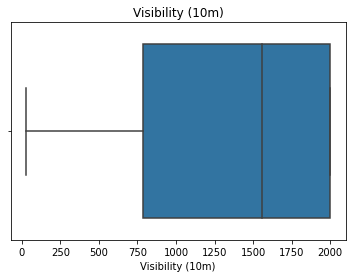

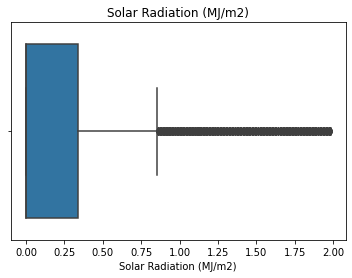

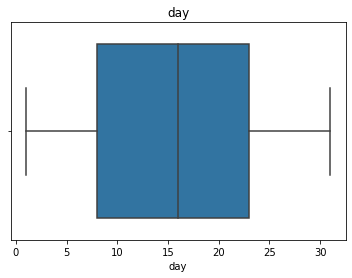

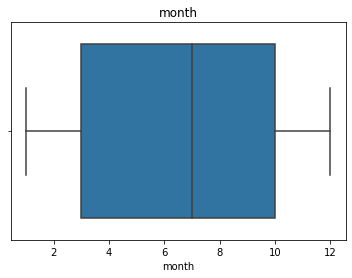

In [233]:
for x in df4.columns:
    if x not in ['Date','Seasons','Holiday','Functioning Day']:
        sns.boxplot(x=df4[x])
        plt.title(x)
        plt.xlabel(x)
        plt.show()

In [236]:
df4.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),day,month
count,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000,6354.000000
mean,504.951684,10.273528,10.967076,62.472616,1.380894,1362.684766,0.282103,15.864337,6.597734
std,437.286289,7.274980,11.293688,20.052331,0.743776,634.619405,0.510793,8.798647,3.576728
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,1.000000,1.000000
25%,158.000000,4.000000,2.300000,48.000000,0.800000,785.250000,0.000000,8.000000,3.000000
50%,352.000000,9.000000,10.900000,63.000000,1.300000,1555.000000,0.000000,16.000000,7.000000
75%,785.000000,17.000000,20.000000,79.000000,1.900000,1996.000000,0.340000,23.000000,10.000000
max,1671.000000,23.000000,39.000000,98.000000,3.100000,2000.000000,1.980000,31.000000,12.000000


In [183]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(C)           8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   day                      8760 non-null   int64  
 10  month                    8760 non-null   int64  
 11  Seasons_Spring           8760 non-null   uint8  
 12  Seasons_Summer           8760 non-null   uint8  
 13  Seasons_Winter           8760 non-null   uint8  
 14  Holiday_No Holiday      

In [237]:
df5 = pd.get_dummies(data,drop_first=True)

In [238]:
df5.drop('Date',1,inplace=True)

In [239]:
df5.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day,month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,15.720548,6.526027,0.252055,0.252055,0.246575,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,8.796749,3.448048,0.434217,0.434217,0.431042,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,8.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,16.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,23.000000,10.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,31.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [240]:
from sklearn.model_selection import train_test_split


In [247]:
X = df5.drop("Rented Bike Count",1)
y = df5['Rented Bike Count']

In [248]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,random_state=26,test_size=0.3)

In [257]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [266]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [272]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [273]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 17.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [274]:
models = [LinearRegression(),
          Lasso(),
          Ridge(),
          RidgeCV(),
          RandomForestRegressor(),
          DecisionTreeRegressor(),
          rf_random]

In [275]:
best_model = None
best_score = 0
for model in models:
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    score = model.score(xtest,ytest)
    if score > best_score:
        best_score = score
        best_model = model
    print(model,score)


LinearRegression() 0.5356472690343351
Lasso() 0.534995921501046
Ridge() 0.5356619894856054
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) 0.5356620015045135
RandomForestRegressor() 0.8773736134237605
DecisionTreeRegressor() 0.748947262140182
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 34.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2) 0.8839240659237813


In [276]:
best_model.score(xtest,ytest)

0.8839240659237813

In [277]:
rf_random.score(xtest,ytest)

0.8839240659237813

In [278]:
import pickle
